# data


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import library
import pandas as pd
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from numpy import array
from scipy import sparse
from scipy.sparse import csr_matrix

In [3]:
%cd "/content/drive/MyDrive/introToFADS/week10"

/content/drive/MyDrive/introToFADS/week10


In [4]:
# load data
users = pd.read_csv('users.csv')
likes = pd.read_csv('likes.csv')
ul = pd.read_csv('users-likes.csv')

In [5]:
likes

,likeid,name
0,3c1636c878e6eb2acfd00c6b61086e38,REIGN by Paul Gibson
1,feca46ddb8ef04f86172ace0cb7e004c,Cupcake Wishes & Birthday Dreams
2,b65f46d64c688fe98bdbcf93a76a71fc,Yo también me rei de la caída de otro jejeje
3,9c5c8bb82d2cd46fbd7582f944fe370e,Abraham Joshua Heschel Day School- Alumni Network
4,2d82fa84ad79b085dc516dde154327a2,Kennesaw Farmer's Market
...,...,...
1580279,6d81e47bfcaca7949a011e1029fc1151,Paradise Airbrush Tanning 949.201.5244
1580280,98dd9df34d0975f662a4963b44189fe6,Outlaw Country
1580281,d168d8b152534056113d70ff3e6badf7,"AND I WAS LIKE, WHAT?"
1580282,b3b53121e9ec13634ff4dbd6e2877df4,Mulan-II-


In [6]:
ul

,userid,likeid
0,71bc7c0901488aec6d30f0add257e7c5,3c1636c878e6eb2acfd00c6b61086e38
1,978ab8e90c4d6ad1a48ef5c973b62f4d,feca46ddb8ef04f86172ace0cb7e004c
2,85123b0e358907725cf19a2cb0ec3983,b65f46d64c688fe98bdbcf93a76a71fc
3,ce110562b3e2f7e5cad3775b32d9caa5,b65f46d64c688fe98bdbcf93a76a71fc
4,8188d20745471273fa69ba44a5b28473,b65f46d64c688fe98bdbcf93a76a71fc
...,...,...
10612321,264088faf4884d77e025a4ceda148b73,20458d0f521d4bd3a0903cf2113a43f3
10612322,d498e43d700dbb0006b733aa912e49c7,20458d0f521d4bd3a0903cf2113a43f3
10612323,76ac7130db7f6065c969402226b7053b,20458d0f521d4bd3a0903cf2113a43f3
10612324,05dcd62425918392dc5d42f7550cbd9e,20458d0f521d4bd3a0903cf2113a43f3


In [7]:
user_row = users.reset_index().set_index('userid').loc[ul.userid, 'index'].values



In [8]:
like_row = likes.reset_index().set_index('likeid').loc[ul.likeid, 'index'].values

In [9]:
ul['user_row'] = user_row
ul['like_row'] = like_row

In [10]:
like_row.shape

(10612326,)

In [11]:
i = np.array(ul['user_row'].tolist())
j = np.array(ul['like_row'].tolist())
# construct the sparse matrix
data = np.ones_like(j)    
S = sparse.csr_matrix((data, (i, j)), dtype=int)

In [12]:
S.shape

(110728, 1580284)

In [13]:
row_names = np.array(users['userid'].tolist())
col_names = np.array(likes['name'].tolist())

In [14]:
def sp_matr_update(maatrix, row_names, col_names):
    sum_rows=np.array(np.sum(maatrix, axis=1)).flatten()
    #print(sum_rows)
    sel_row=[]
    for i in range(len(sum_rows)):
        if sum_rows[i]>= 50:
            sel_row.append(i)
    #print(sel_row)
    sel_row=np.array(sel_row)
    sum_cols=np.array(np.sum(maatrix, axis=0)).flatten()
    #print(sum_cols)
    sel_col=[]
    for i in range(len(sum_cols)):
        if sum_cols[i]>= 150:
            sel_col.append(i)
    #print(sel_col)
    sel_col=np.array(sel_col)
    maatrix_=maatrix.tocsr()[sel_row,:]
    maatrix_=maatrix_.tocsr()[:, sel_col]
    #print(sel_row)
    row_names_ = row_names[sel_row]
    #print(row_names.shape)
    col_names_ = col_names[sel_col]
    #print(col_names.shape)
    return maatrix_, row_names_, col_names_

In [15]:
i_sum=np.sum(S.shape)
new_matrix, new_row_names, new_col_names = sp_matr_update(S, row_names, col_names)
print(new_matrix.shape)
for i in range(9):
    new_matrix, new_row_names, new_col_names=sp_matr_update(new_matrix, new_row_names, new_col_names)
    print(new_matrix.shape)
    i_sum=np.sum(new_matrix.shape)

(35112, 10830)
(22670, 9670)
(21362, 8801)
(20285, 8690)
(20087, 8569)
(19848, 8555)
(19819, 8530)
(19758, 8529)
(19753, 8523)
(19742, 8523)


In [16]:
M2=pd.DataFrame.sparse.from_spmatrix(new_matrix, index=new_row_names, columns=new_col_names)
M2


,Titanic,I run away when I press a toy at a store and it wont stop making noises.,"If you like me, Tell Me, if you miss me, Show it, if you love me, Prove it",The Twilight Zone,Boy Meets World,The Eagles,Kurt Hummel (Glee),"2 most said things in school, I'm tired. and Can I have a piece of gum?",I Hate Mosquitos,Scrabble,A,IHOP,Putting on warm clothes straight from the dryer!,Atonement,Smallville,iTunes,Official Grease Movie,finding money in your pocket that you forgot you left in there.,You Shutting The F?ck Up,Creating situations in your head that will NEVER happen in real life.,"I think its funny when sluts hate sluts, For being sluts.",i hate it when your yelling at somebody and u mess up a word.,Getting up too fast and going blind for a couple of seconds.,Rooney,The Devil Wears Prada,The awkward moment when a sex scence comes on the movie you're watching with your parents.,The Outsiders,When I'm sad I cut myself... another slice of cheesecake.,Betty Crocker,'Like' this if you think cellphones should be waterproof =),Jason Statham,HEYYYY COME HERE ITS IMPORTANT what can u turn off my light?,Tosh.0,Let's remember those who have passed. Press Like if you've lost a loved one...,Can somebody please tell this bitch nobody likes her.,ScienceNOW,Kathy Griffin,"You're my best friend, he treats you like crap. Of course I hate him.",Rihanna,The Da Vinci Code,...,Law & Order: Special Victims Unit,Dipping your fingers in melted wax and then peeling it off when it dries up,28 Days Later,The Time Traveler's Wife,Gibson Guitar,Will Schuester (Glee),Carolina Liar,Curly Fries,Michael Jackson's This Is It,"100,000 strong to gain a dislike button.",The word Shenanigans,The Wedding Singer,Talking Heads,Mario Kart,"Life's not a garden, Don't be a hoe",I SURVIVED SWINE '09,John Cena - WWE Universe,Panera Bread,I HATE DOUCHEBAGS,Miranda Cosgrove,Florida Gators,British Accents,5 More Minutes of Sleep in the Morning Really DOES Matter,Oasis,Chewing gum in class,Dallas Cowboys,Chase Coy,Matisyahu,Channing Tatum Unwrapped,"Waking up in the night, and then realizing you still have hours to sleep.",Attacking the Vending Machine When Your Food Gets Stuck,Tron,deadmau5,Zach Braff,traveling,Monsters,Darren Criss,The Princess and the Frog,Supernatural,Sade
c6a9a43058c8cc8398ca6e97324c0fae,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
e557fd2902b857797cb8cec471f201a5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
f9ed42fd1c0e0e1ecd2ba3fdb54ce6fa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
eca69bfad8f4f2b193b2592248101b7f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1e4e4517e035a0d5f6dd5bfd1fe65890,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995772c890538007229320216aec92f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
f9a122ccb0ae03e0e67a6024f46d38d9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8a1c71c937b9a01c6983d86a4

In [17]:
M2_arr = M2.to_numpy()

In [18]:
M2_arr = M2_arr.astype(np.int32)

In [19]:
from scipy.linalg import svd as svd2
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd

In [20]:
U, Sigma, VT = randomized_svd(M2_arr, 
                              n_components=5,
                              n_iter=5,
                              random_state=68)

In [21]:
Sigma

array([635.44467823, 378.45856055, 200.92846127, 182.23532269,
       160.44100595])

In [22]:
v = VT.T

In [23]:
v.shape

(8523, 5)

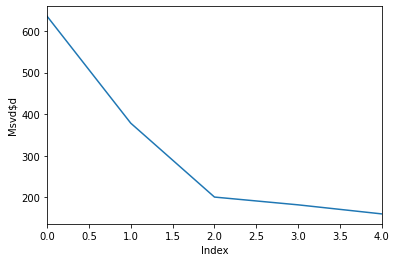

In [24]:
plt.plot(Sigma)
plt.ylabel('Msvd$d')
plt.xlabel('Index')
plt.xlim(left=0, right=4)
plt.show()

In [25]:
from numpy import eye, asarray, dot, sum, diag
from numpy.linalg import svd

def varimax(Phi, gamma = 1, q = 20, tol = 1e-6):
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in range(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d/d_old < tol: break
    return dot(Phi, R)

In [26]:
v_vot = varimax(v)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


In [27]:
v[0:5]

array([[ 6.11129229e-03, -3.01286779e-03,  4.23397926e-03,
        -1.04891387e-02,  1.07027240e-02],
       [ 2.56244091e-03, -2.48048293e-05, -1.57992647e-03,
        -9.53728620e-03,  9.34919193e-04],
       [ 2.88872886e-03,  3.56999547e-03,  2.29329974e-03,
        -3.65057389e-03, -9.27850299e-03],
       [ 1.65133380e-03, -4.32226461e-03,  8.44438385e-03,
         1.02834013e-02, -5.60812480e-03],
       [ 2.74624645e-03, -1.68377972e-03,  3.81887070e-03,
        -8.35110086e-03, -9.95118244e-04]])

In [28]:
v_vot[0:5]

array([[ 5.92032311e-03, -4.57816872e-04, -4.54762431e-03,
        -1.49779148e-02,  2.93998956e-03],
       [-7.15376600e-04, -1.22776823e-03, -6.30220133e-03,
        -6.93549558e-03, -3.32547279e-03],
       [-1.95990986e-03,  2.30734460e-03,  1.04557851e-03,
        -3.06646887e-04, -1.07430815e-02],
       [ 3.87824401e-05,  1.56862661e-03,  1.48398003e-02,
         2.64982537e-03, -4.61042074e-04],
       [-1.21174926e-03,  1.44815790e-03, -1.17535271e-03,
        -8.63286955e-03, -4.02722172e-03]])

In [29]:
u_rot = np.dot(M2_arr,v_vot)

In [30]:
u_rot.shape

(19742, 5)

In [63]:
user_row_new = users.reset_index().set_index('userid').loc[new_row_names, 'index'].values
newusers=users.loc[ user_row_new , : ]
newusers = newusers.drop('userid', axis=1)
newusers.index=range(19742)
newusers

,gender,age,political,ope,con,ext,agr,neu
0,0,47,NaN,-0.31,-0.57,-0.89,0.41,1.17
1,0,35,NaN,0.61,-0.12,-0.64,-1.01,-1.50
2,1,29,0.0,-0.31,-0.94,-0.77,-1.76,1.05
3,1,28,0.0,-0.68,0.54,-0.52,-1.01,-0.51
4,0,35,NaN,-0.41,-0.86,-1.02,-0.18,0.30
...,...,...,...,...,...,...,...,...
19737,1,23,NaN,-0.31,-1.97,-1.21,-1.09,1.79
19738,1,26,1.0,1.26,0.17,1.11,0.12,0.18
19739,1,20,NaN,-0.04,0.69,0.17,0.82,0.80
19740,1,35,0.0,1.63,-0.72,1.86,1.41,-1.01


In [64]:
print(np.max(newusers["ope"]))
print(np.min(newusers["ope"]))

1.9
-5.22


In [32]:
newusers_np = newusers.to_numpy()

In [33]:
u_rot.shape

(19742, 5)

In [34]:
u_rot_t = u_rot.T
newusers_np_t = newusers_np.T

In [35]:
def pcorrelation(np_arr1, np_arr2):
    #correlation - one vectorized solution using broadcasting -
    #https://stackoverflow.com/questions/33650188/efficient-pairwise-correlation-for-two-matrices-of-features/33651442#33651442
    
    # Get number of rows in either A or B
    N = np_arr1.shape[0]
    
    # Store columnw-wise in A and B, as they would be used at few places
    sA = np_arr2.sum(0)
    sB = np_arr1.sum(0)
    
    # Basically there are four parts in the formula. We would compute them one-by-one
    p1 = N*np.einsum('ij,ik->kj',np_arr2,np_arr1)
    p2 = sA*sB[:,None]
    p3 = N*((np_arr1**2).sum(0)) - (sB**2)
    p4 = N*((np_arr2**2).sum(0)) - (sA**2)
    
    # Finally compute Pearson Correlation Coefficient as 2D array 
    pcorr = ((p1 - p2)/np.sqrt(p4*p3[:,None]))
    
    # Get the element corresponding to absolute argmax along the columns 
    out = pcorr[np.nanargmax(np.abs(pcorr),axis=0),np.arange(pcorr.shape[1])]
    return pcorr

In [36]:
pcorr=pcorrelation(newusers_np, u_rot)

In [37]:
pcorr_t = pcorr.T

In [38]:
pcorr_df = pd.DataFrame({'gender': pcorr_t[:, 0], 'age': pcorr_t[:, 1], 'political': pcorr_t[:, 2],'ope': pcorr_t[:, 3],'con': pcorr_t[:, 4],'ext': pcorr_t[:, 5],'agr': pcorr_t[:, 6],'neu': pcorr_t[:, 7]})
pcorr_df

,gender,age,political,ope,con,ext,agr,neu
0,0.106599,-0.191047,NaN,-0.056489,-0.080904,0.001797,-0.023170,0.066799
1,-0.103728,0.136168,NaN,0.096356,0.009801,-0.074727,-0.025565,-0.012013
2,-0.171072,0.144912,NaN,0.196468,-0.042305,-0.011049,-0.007029,-0.029181
3,-0.011215,0.088553,NaN,-0.048523,0.038322,0.016669,0.015859,-0.070278
4,-0.110245,0.158118,NaN,0.067437,0.068592,-0.027678,0.041180,-0.066856


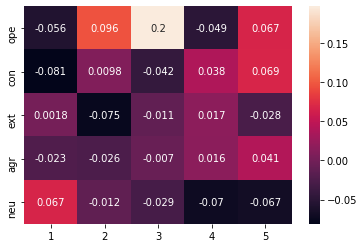

In [39]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

Index= pcorr_df.drop(['gender', 'age', 'political'], axis=1).columns.tolist()
Cols = ['1', '2', '3', '4', '5']
df = DataFrame(pcorr[3:,:], index=Index, columns=Cols)

sns.heatmap(df, annot=True)

In [40]:
folds = np.random.choice(range(0,10),newusers_np.shape[0])
folds

array([1, 4, 6, ..., 4, 3, 4])

In [41]:
folds.tolist().index(9)

3

In [42]:
test_arr=np.where(np.isin(folds, 0))[0].tolist()
train_arr=np.where(np.isin(folds, range(1,10)))[0].tolist()
train_subset=[True if folds[i]!=0 else False for i in range(len(folds))]
test_subset=[True if folds[i]==0 else False for i in range(len(folds))]

In [43]:
M_df= pd.DataFrame(data=M2_arr[0:,0:],
                      index=[i for i in range(M2_arr.shape[0])],
                      columns=['f'+str(i) for i in range(M2_arr.shape[1])])

In [44]:
M_df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f8483,f8484,f8485,f8486,f8487,f8488,f8489,f8490,f8491,f8492,f8493,f8494,f8495,f8496,f8497,f8498,f8499,f8500,f8501,f8502,f8503,f8504,f8505,f8506,f8507,f8508,f8509,f8510,f8511,f8512,f8513,f8514,f8515,f8516,f8517,f8518,f8519,f8520,f8521,f8522
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19738,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
19739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19740,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
M_train_df = M_df.iloc[train_arr,]
#test shape
M_train_df.shape

(17739, 8523)

In [46]:
M_train = M_train_df.to_numpy()

In [47]:
#svd on test database with nv = 50
U2, Sigma2, VT2 = randomized_svd(M_train, 
                              n_components=50,
                              n_iter=5,
                              random_state=68)

In [48]:
VT2_t = VT2.T

In [49]:
#varimax on vt2
v_vot2 = varimax(VT2_t)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


In [50]:
u_rot2 = np.dot(M2_arr,v_vot2)

In [51]:
u_rot2

array([[ 0.01862601, -0.04906459, -0.21975097, ...,  0.0652124 ,
         0.04316037,  0.05990303],
       [ 0.02911364, -0.05866561, -0.17653036, ...,  0.02802155,
        -0.10600923, -0.18722575],
       [ 0.00389507,  0.05770375,  0.04940979, ...,  0.13345801,
        -0.49137507, -0.35001465],
       ...,
       [-0.06237385, -0.03360605, -0.42065651, ...,  0.04165091,
        -0.45994918, -0.44492202],
       [-0.16851313, -0.04657627,  0.18535084, ...,  0.17818081,
        -0.14322637,  0.19795132],
       [-0.29892847,  0.18154505,  1.21100404, ...,  0.3950509 ,
         0.40471083, -3.58444579]])

In [52]:
newusers

,gender,age,political,ope,con,ext,agr,neu
0,0,47,NaN,-0.31,-0.57,-0.89,0.41,1.17
1,0,35,NaN,0.61,-0.12,-0.64,-1.01,-1.50
2,1,29,0.0,-0.31,-0.94,-0.77,-1.76,1.05
3,1,28,0.0,-0.68,0.54,-0.52,-1.01,-0.51
4,0,35,NaN,-0.41,-0.86,-1.02,-0.18,0.30
...,...,...,...,...,...,...,...,...
19737,1,23,NaN,-0.31,-1.97,-1.21,-1.09,1.79
19738,1,26,1.0,1.26,0.17,1.11,0.12,0.18
19739,1,20,NaN,-0.04,0.69,0.17,0.82,0.80
19740,1,35,0.0,1.63,-0.72,1.86,1.41,-1.01


In [53]:
x = newusers[["age","political","ope","con","ext","agr","neu"]]
y = newusers['gender']

yg = y.iloc[train_arr,]
xg = x.iloc[train_arr,]
xg = xg[:].values
yg_test = y.iloc[test_arr,]

In [54]:
x2 = newusers[["gender","political","ope","con","ext","agr","neu"]] 
y2 = newusers['ope']

yo = y2.iloc[train_arr,]
yo_test = y2.iloc[test_arr,]
xo = x2.iloc[train_arr,]
xo = xo[:].values

In [55]:
u_rot2_df = pd.DataFrame(data=u_rot2[0:,0:],
                         index=[i for i in range(u_rot2.shape[0])],
                         columns=['f'+str(i) for i in range(u_rot2.shape[1])])

In [56]:
train = u_rot2_df.iloc[train_arr,]
test = u_rot2_df.iloc[test_arr,]

In [57]:
train.shape

(17739, 50)

In [58]:
#GLM 1
from sklearn.linear_model import LinearRegression
# Create model
linreg = LinearRegression()
fit_o=linreg.fit(train, yo)
fit_o.coef_

array([ 0.00244354, -0.03894977, -0.08280833,  0.06355883,  0.01731283,
        0.087771  , -0.06577111,  0.01431123, -0.01325374,  0.0025114 ,
        0.01248128, -0.00417557,  0.0389879 , -0.05813831,  0.00048109,
       -0.08121874,  0.05537926, -0.00706858,  0.06044788,  0.02466947,
        0.01375291,  0.11144112, -0.02841138, -0.02879002, -0.05038594,
        0.09419933,  0.2221864 ,  0.0758093 ,  0.00188528, -0.01257377,
       -0.01037804, -0.16707732, -0.02979509,  0.04348692,  0.01079272,
        0.02288445,  0.02252559,  0.12953552, -0.00224002,  0.05133612,
       -0.17613995, -0.07361773,  0.23278348,  0.08221058,  0.06926971,
       -0.10274102,  0.06637208,  0.05951059, -0.0173401 , -0.10591706])

In [59]:
# Calculate our y hat (how our model performs against the test data held off)
pred_o = linreg.predict(test)
pred_o

array([0.17596279, 0.33279527, 0.42096749, ..., 0.25859465, 0.30670085,
       0.30286958])

In [60]:
from sklearn.linear_model import LogisticRegression
# Create model
logreg = LogisticRegression()
logreg.fit(train, yg)
# Calculate our y hat (how our model performs against the test data held off)
pred_g = logreg.predict(test)
pred_g

array([0, 0, 1, ..., 1, 1, 0])

In [61]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(yo_test, pred_o))
print('Mean Squared Error:', metrics.mean_squared_error(yo_test, pred_o))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yo_test,pred_o)))

Mean Absolute Error: 0.6580024545846509
Mean Squared Error: 0.7007342209359607
Root Mean Squared Error: 0.8370986924705837


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.874


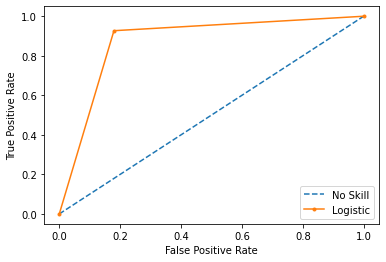

In [62]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
ns_probs = [0 for _ in range(len(yg_test))]
ns_auc = roc_auc_score(yg_test, ns_probs)
lr_auc = roc_auc_score(yg_test, pred_g)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(yg_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(yg_test, pred_g)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [63]:
VT2_t.shape

(8523, 50)

In [64]:
from scipy.stats.stats import pearsonr
# Choose which k are to be included in the analysis
ks=[2, 4, 6, 8, 10, 15,20,30,40,50]
rs=[]
for k in ks:
    print(k)
    # Varimax rotate Like SVD dimensions 1 to k
    v_rot = varimax(VT2_t[:,:k])
    # This code is exactly like the one discussed earlier
    u_rot2 = np.dot(M2_arr,v_rot)
    u_rot2_df = pd.DataFrame(data=u_rot2[0:,0:],
                         index=[i for i in range(u_rot2.shape[0])],
                         columns=['f'+str(i) for i in range(u_rot2.shape[1])])
    fit_o = linreg.fit( u_rot2_df[train_subset], y2[train_subset])
    pred_o = linreg.predict(u_rot2_df[test_subset])
    
    # Save the resulting correlation coefficient as the
    # element called k
    rs.append(pearsonr(yo_test, pred_o)[0])
rs

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


6


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


8


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


10


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


15


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


20


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


30


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


40


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


50


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


[0.11362237964600003,
 0.3075516958788759,
 0.313013448348612,
 0.3629163369954234,
 0.36451344552270715,
 0.3921119461967932,
 0.4391205739569725,
 0.4505703805955405,
 0.47136694671144447,
 0.4822269675329226]

Text(0.5, 0, 'k')

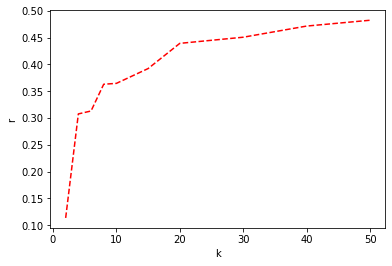

In [65]:
data = pd.DataFrame({'k':ks,'r':rs})
plt.plot(data['k'], data['r'], linestyle='--', color='red')
plt.ylabel('r')
plt.xlabel('k')

In [66]:
pred_o = []
for i in range(10):
    test_subset = (folds == i)
    train_subset=(folds != i)
    M_df_train=(M_df[train_subset]).to_numpy()
    M_df_test=(M_df[test_subset]).to_numpy()
    #svd on test database with nv = 50
    U2, Sigma2, VT2 = randomized_svd(M_df_train, 
                              n_components=50,
                              n_iter=5,
                              random_state=68)
    VT2_t = VT2.T
    # Varimax rotate Like SVD dimensions 1 to k
    v_rot = varimax(VT2_t)
    # This code is exactly like the one discussed earlier
    u_rot2 = np.dot(M2_arr,v_rot)
    u_rot2_df = pd.DataFrame(data=u_rot2[0:,0:],
                         index=[i for i in range(u_rot2.shape[0])],
                         columns=['f'+str(i) for i in range(u_rot2.shape[1])])
    yo = y2[train_subset]
    yo_test = y2[test_subset]
    fit_o = linreg.fit( u_rot2_df[train_subset], yo)
    pred_o.insert(i,linreg.predict(u_rot2_df[test_subset]))
out = np.concatenate(pred_o).ravel()
pred_o=out.tolist()
r=max(pearsonr(y2, pred_o))
r

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero e

0.9362888691858076

In [67]:
n_folds = 10
vars=(newusers.columns).values.tolist() # choose variables to predict

In [68]:
vars

['gender', 'age', 'political', 'ope', 'con', 'ext', 'agr', 'neu']

In [74]:
from sklearn.metrics import accuracy_score
results = {}
accuracies = {}
for fold in range(n_folds): 
    print("Cross-validated predictions, fold: ", fold)
    test_subset = (folds == fold)
    train_subset=(folds != fold)
    #svd on test database with nv = 50
    U2, Sigma2, VT2 = randomized_svd(M_df_train, 
                              n_components=50,
                              n_iter=5,
                              random_state=68)
    VT2_t = VT2.T
    # Varimax rotate Like SVD dimensions 1 to k
    v_rot = varimax(VT2_t)
    # This code is exactly like the one discussed earlier
    u_rot2 = np.dot(M2_arr,v_rot)
    predictors = pd.DataFrame(data=u_rot2[0:,0:],
                         index=[i for i in range(u_rot2.shape[0])],
                         columns=['f'+str(i) for i in range(u_rot2.shape[1])])
    result_list=[]
    accuracy_list=[]
    for var in vars:
        # check if the variable is dichotomous
        y=newusers[var]
        y_train = y[train_subset]
        y_test = y[test_subset]
        if len(((newusers[var].dropna()).unique())) ==2:
            y_train.fillna(method='ffill', inplace = True)
            y_train.fillna(method='bfill', inplace = True)
            y_test.fillna(method='ffill', inplace = True)
            y_test.fillna(method='bfill', inplace = True)
            fit = logreg.fit(predictors[train_subset], y_train)
            result_list.append(logreg.predict(predictors[test_subset]))
            accuracy_list.append(accuracy_score(y_test.values, logreg.predict(predictors[test_subset])))
        else:
            fit = linreg.fit(predictors[train_subset], y_train)
            result_list.append(logreg.predict(predictors[test_subset]))
    results[fold] = result_list
    accuracies[fold] = accuracy_list

Cross-validated predictions, fold:  0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


Cross-validated predictions, fold:  1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


Cross-validated predictions, fold:  2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


Cross-validated predictions, fold:  3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


Cross-validated predictions, fold:  4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


Cross-validated predictions, fold:  5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


Cross-validated predictions, fold:  6


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


Cross-validated predictions, fold:  7


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


Cross-validated predictions, fold:  8


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


Cross-validated predictions, fold:  9


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


In [75]:
accuracies

{0: [0.8587939698492463, 0.6613065326633166],
 1: [0.8613402061855671, 0.6896907216494845],
 2: [0.8618871903004744, 0.7047970479704797],
 3: [0.8664259927797834, 0.6936565239814337],
 4: [0.87178241864983, 0.707625060709082],
 5: [0.8628019323671497, 0.678743961352657],
 6: [0.8701898409440739, 0.6536685479733196],
 7: [0.8713541666666667, 0.6541666666666667],
 8: [0.8656867714140902, 0.6857577293461733],
 9: [0.8633416458852868, 0.6937655860349127]}

In [76]:
i = np.array([2,3,6,2,3,4,6,0,1,6,0,1,6,4,5,4,5])
j = np.array([0,0,0,1,1,1,1,2,2,2,3,3,3,4,4,5,5])
# construct the sparse matrix
data = np.ones_like(j)    
S = sparse.csr_matrix((data, (i, j)), dtype=int)

In [77]:
S.shape

(7, 6)

In [78]:
row_names = np.array(["Noah", "Emma", "Mason", "Sophia", "William", "James", "Tom"])
col_names = np.array(["True Romance", "Pretty Woman", "Aliens", "Star Wars", "Due Date", "Hangover"])

In [79]:
M2=pd.DataFrame.sparse.from_spmatrix(S, index=row_names, columns=col_names)
M2

,True Romance,Pretty Woman,Aliens,Star Wars,Due Date,Hangover
Noah,0,0,1,1,0,0
Emma,0,0,1,1,0,0
Mason,1,1,0,0,0,0
Sophia,1,1,0,0,0,0
William,0,1,0,0,1,1
James,0,0,0,0,1,1
Tom,1,1,1,1,0,0


In [80]:
M2_arr=M2.to_numpy()

In [81]:
M2_arr = M2_arr.astype(np.int32)

In [82]:
U, Sigma, VT = randomized_svd(M2_arr, 
                              n_components=3,
                              n_iter=3,
                              random_state=68)

In [83]:
U

array([[ 0.30274607, -0.42186829,  0.32158235],
       [ 0.30274607, -0.42186829,  0.32158235],
       [ 0.36871992,  0.23594673, -0.40872787],
       [ 0.36871992,  0.23594673, -0.40872787],
       [ 0.2926492 ,  0.57981127,  0.39581314],
       [ 0.09094364,  0.4024483 ,  0.5429459 ],
       [ 0.67146599, -0.18592156, -0.08714552]])

In [84]:
Sigma

array([2.9044511 , 2.20939357, 1.85957537])

In [85]:
v = VT.T

In [86]:
v

array([[ 0.48508506,  0.12943457, -0.48645582],
       [ 0.58584392,  0.39186462, -0.27360446],
       [ 0.43965558, -0.46603654,  0.29900331],
       [ 0.43965558, -0.46603654,  0.29900331],
       [ 0.13207068,  0.44458334,  0.50482441],
       [ 0.13207068,  0.44458334,  0.50482441]])

In [87]:
v_vot = varimax(v)
v_vot

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


array([[ 6.72414144e-01, -1.13983917e-02, -1.90864817e-01],
       [ 7.40034702e-01,  9.43112705e-03,  1.54564154e-01],
       [-5.05371136e-04, -7.07027906e-01,  1.16286456e-03],
       [-5.05371136e-04, -7.07027906e-01,  1.16286456e-03],
       [ 1.01820565e-02, -1.45081087e-03,  6.85447970e-01],
       [ 1.01820565e-02, -1.45081087e-03,  6.85447970e-01]])

In [88]:
u_rot = np.dot(M2_arr,v_vot)
u_rot

array([[-1.01074227e-03, -1.41405581e+00,  2.32572912e-03],
       [-1.01074227e-03, -1.41405581e+00,  2.32572912e-03],
       [ 1.41244885e+00, -1.96726468e-03, -3.63006627e-02],
       [ 1.41244885e+00, -1.96726468e-03, -3.63006627e-02],
       [ 7.60398815e-01,  6.52950532e-03,  1.52546009e+00],
       [ 2.03641130e-02, -2.90162173e-03,  1.37089594e+00],
       [ 1.41143810e+00, -1.41602308e+00, -3.39749335e-02]])

In [89]:
meanPoint = S.mean(axis = 0)

# subtract mean point
S-= meanPoint

In [90]:
M2=pd.DataFrame(S, index=row_names, columns=col_names)
M2

,True Romance,Pretty Woman,Aliens,Star Wars,Due Date,Hangover
Noah,-0.428571,-0.571429,0.571429,0.571429,-0.285714,-0.285714
Emma,-0.428571,-0.571429,0.571429,0.571429,-0.285714,-0.285714
Mason,0.571429,0.428571,-0.428571,-0.428571,-0.285714,-0.285714
Sophia,0.571429,0.428571,-0.428571,-0.428571,-0.285714,-0.285714
William,-0.428571,0.428571,-0.428571,-0.428571,0.714286,0.714286
James,-0.428571,-0.571429,-0.428571,-0.428571,0.714286,0.714286
Tom,0.571429,0.428571,0.571429,0.571429,-0.285714,-0.285714


In [91]:
M2_arr=M2.to_numpy()

In [92]:
U, Sigma, VT = randomized_svd(M2_arr, 
                              n_components=3,
                              n_iter=3,
                              random_state=68,)

In [93]:
U

array([[-0.4148071 , -0.33845986, -0.15197534],
       [-0.4148071 , -0.33845986, -0.15197534],
       [ 0.10567562,  0.48893385, -0.31579544],
       [ 0.10567562,  0.48893385, -0.31579544],
       [ 0.53264655, -0.14609781,  0.54115228],
       [ 0.45883588, -0.43759406, -0.24083287],
       [-0.37321946,  0.28274389,  0.63522217]])

In [94]:
Sigma

array([2.24128764, 1.95535779, 0.83466604])

In [95]:
v = VT.T
v

array([[-0.07222109,  0.64469612,  0.00435058],
       [ 0.16543094,  0.56997946,  0.65269645],
       [-0.53667081, -0.20158757,  0.39689105],
       [-0.53667081, -0.20158757,  0.39689105],
       [ 0.44237179, -0.29850899,  0.35980787],
       [ 0.44237179, -0.29850899,  0.35980787]])

In [96]:
v_vot = varimax(v)
v_vot

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


array([[ 0.15509828,  0.43368752,  0.45686711],
       [-0.04684413, -0.08104145,  0.87720838],
       [-0.69658815,  0.01412373,  0.02722294],
       [-0.69658815,  0.01412373,  0.02722294],
       [ 0.04049729, -0.63440856,  0.10073659],
       [ 0.04049729, -0.63440856,  0.10073659]])

In [97]:
u_rot = np.dot(M2_arr,v_vot)
u_rot

array([[-0.85894466,  0.2391039 , -0.72351396],
       [-0.85894466,  0.2391039 , -0.72351396],
       [ 0.64248577,  0.56350252,  0.55611566],
       [ 0.64248577,  0.56350252,  0.55611566],
       [ 0.56838208, -1.13900214,  0.30072172],
       [ 0.61522621, -1.05796069, -0.57648666],
       [-0.75069052,  0.59174998,  0.61056154]])

In [98]:
u_rot_df=pd.DataFrame(u_rot, index=row_names)
u_rot_df

,0,1,2
Noah,-0.858945,0.239104,-0.723514
Emma,-0.858945,0.239104,-0.723514
Mason,0.642486,0.563503,0.556116
Sophia,0.642486,0.563503,0.556116
William,0.568382,-1.139002,0.300722
James,0.615226,-1.057961,-0.576487
Tom,-0.750691,0.591750,0.610562
